In [1]:
########## 20 June 2018 - Alec S. Hirschauer ##########
# Today I am going to make CMDs and CCDs for NGC 6822 using Python
# drawing from the Khan et al. (2015) Spitzer data set
# matched with the Whitelock et al. (2013) IRSF data set.
#
# I have run a CasJobs query to create a new table of values
# locally saved as a .csv file, with all relevant color terms
# already built in to the spreadsheet.
#
# These plots are based on the CMDs/CCDs from Ruffle et al. (2015)
# as well as Jones et al. (2017), which has two additional plots.

In [2]:
# First thing needed is to import the relevant Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
# This last line is new, and is necessary for the number density histograms.

In [3]:
# Read in my data from a .csv file saved locally.
phot_data = pd.read_csv('CMDparameters18June2018_ahirschauer.csv')
# This is a table of values with ~30,000 rows which contains the photometric data of
# the Khan et al. (2015) catalog matched to sources from Whitelock et al. (2013)
# with an "OR" command, then downloaded from MAST CasJobs.

In [4]:
# In my first iteration of making CMDs, I found a few erroneous color values well in excess
# of the standard plot boundaries, which made the axes ludicrously proportioned.
# While clearly I could simply define the scale of the axes such that these
# outliers are skipped, if I wanted to do any analysis of the dataset as a whole
# it is more useful for me to trim them.
#
# These erroneous color values were all in the vicinity of +/-10,000, which come from
# the fact that 'null' values in the catalog of photometric sources had been set to "-9999"
# and therefore a small value minus -9,999 becomes roughly 10,000,
# or -9,999 minus a small value becomes roughly -10,000.
#
# Rather than set individual cuts for every afflicted column (as I had tried to do earlier),
# I am making a global cut of the whole dataframe so that no value is outside of the range
# of -500.0 to +500.0, which hopefully encompasses everything useful (including RA & Dec).
#
phot_data = phot_data[(phot_data < 500.0) & (phot_data > -500.0)]
#
# The above command trims the 'phot_data' dataframe,
# but later on when I plot and/or analyze the data,
# I'd like to specify that we're dealing with a "filtered" data set,
# so the command below does that.
#
filter_phot_data = phot_data

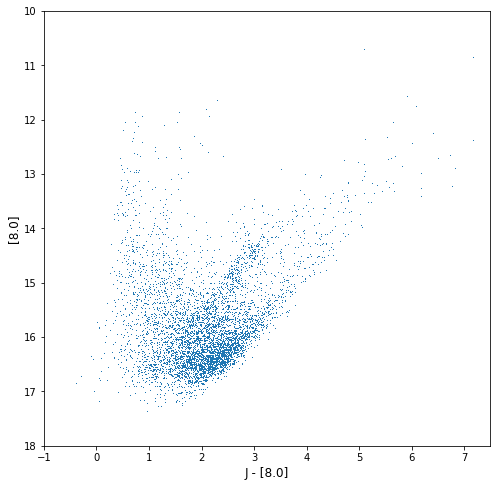

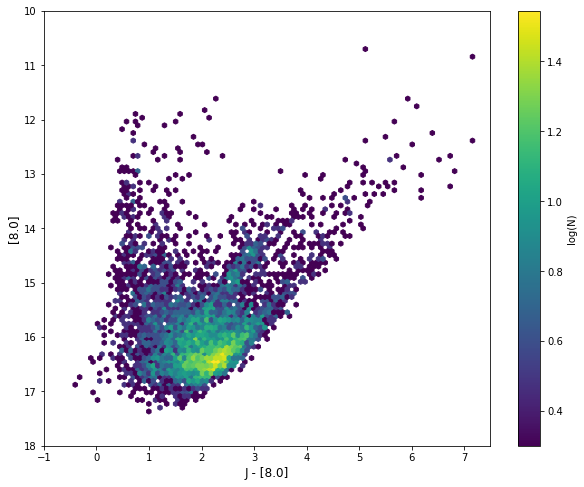

In [5]:
# [8.0] vs. J-[8.0]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSeightzero,filter_phot_data.k80mag,',')
plt.xlim(-1.0, 7.5)
plt.ylim(18.0, 10.0)
plt.xlabel('J - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#plt.savefig('[8.0]_vs_J-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.0, 7.5)
plt.ylim(18.0, 10.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSeightzero, filter_phot_data.k80mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.0, 7.5, 18.0, 10.0))
ax1.set_xlabel('J - [8.0]', size=12)
ax1.set_ylabel('[8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[8.0]_vs_J-[8.0]_hist.pdf')

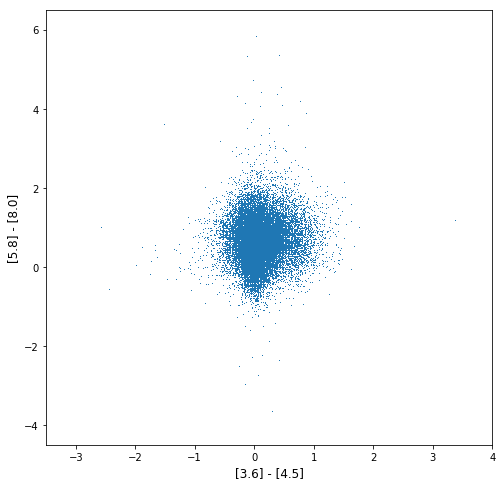

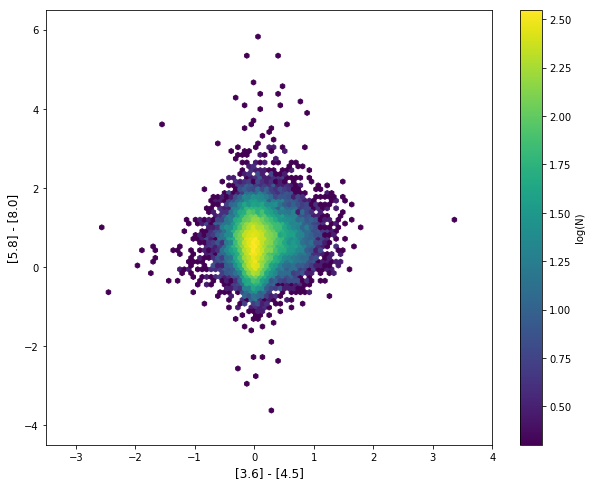

In [6]:
# [5.8]-[8.0] vs. [3.6]-[4.5]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.threesixMINUSfourfive, filter_phot_data.fiveeightMINUSeightzero,',')
plt.xlim(-3.5, 4.0)
plt.ylim(-4.5, 6.5)
plt.xlabel('[3.6] - [4.5]', size=12)
plt.ylabel('[5.8] - [8.0]', size=12)
#plt.savefig('[5.8]-[8.0]_vs_[3.6]-[4.5]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.5, 4.0)
plt.ylim(-4.5, 6.5)
im1 = ax1.hexbin(filter_phot_data.threesixMINUSfourfive, filter_phot_data.fiveeightMINUSeightzero, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.5, 4.0, -4.5, 6.5))
ax1.set_xlabel('[3.6] - [4.5]', size=12)
ax1.set_ylabel('[5.8] - [8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[5.8]-[8.0]_vs_[3.6]-[4.5]_hist.pdf')

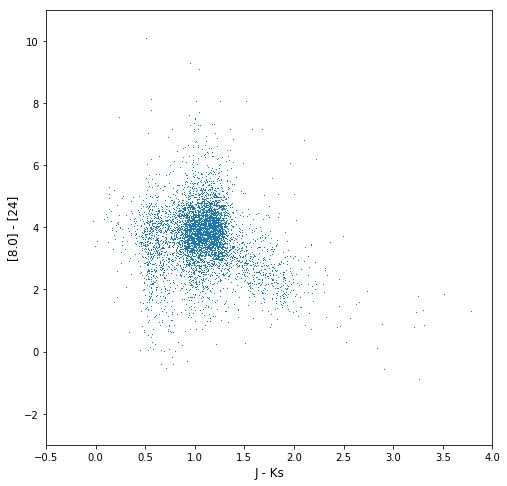

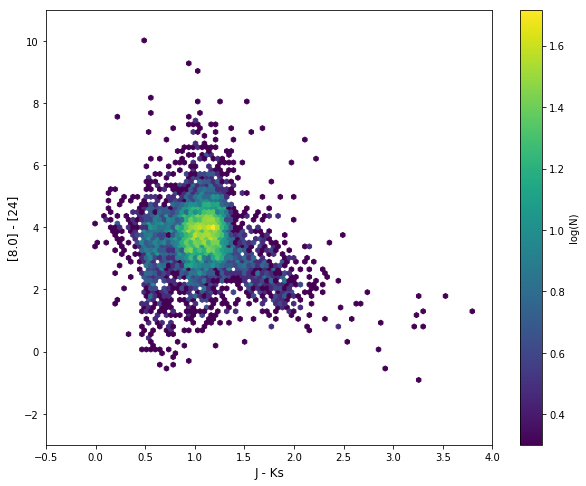

In [7]:
# [8.0]-[24] vs. J-Ks 
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSk, filter_phot_data.eightzeroMINUStwentyfour,',')
plt.xlim(-0.5, 4.0)
plt.ylim(-3.0, 11.0)
plt.xlabel('J - Ks', size=12)
plt.ylabel('[8.0] - [24]', size=12)
#plt.savefig('[8.0]-[24]_vs_J-Ks_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-0.5, 4.0)
plt.ylim(-3.0, 11.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSk, filter_phot_data.eightzeroMINUStwentyfour, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 4.0, -3.0, 11.0))
ax1.set_xlabel('J - Ks', size=12)
ax1.set_ylabel('[8.0] - [24]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[8.0]-[24]_vs_J-Ks_hist.pdf')

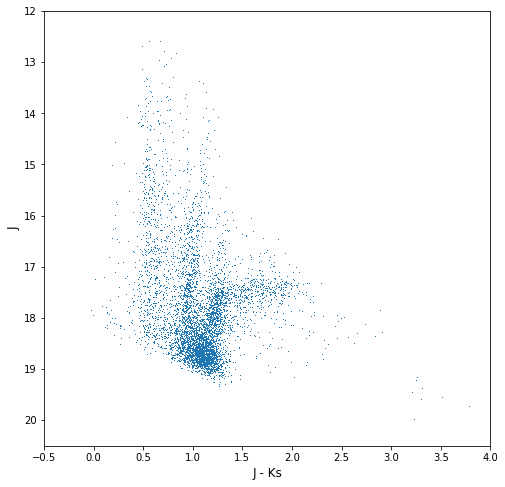

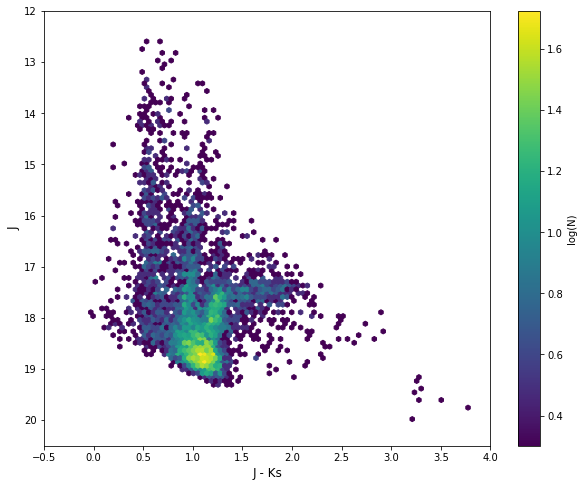

In [8]:
# J vs. J - Ks
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSk,filter_phot_data.Jmag,',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.5, 12.0)
plt.xlabel('J - Ks', size=12)
plt.ylabel('J', size=12)
#plt.savefig('J_vs_J-Ks_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-0.5, 4.0)
plt.ylim(20.5, 12.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSk, filter_phot_data.Jmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 4.0, 20.5, 12.0))
ax1.set_xlabel('J - Ks', size=12)
ax1.set_ylabel('J', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('J_vs_J-Ks_hist.pdf')

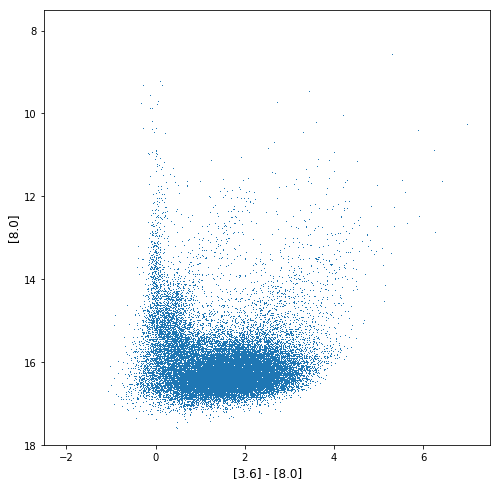

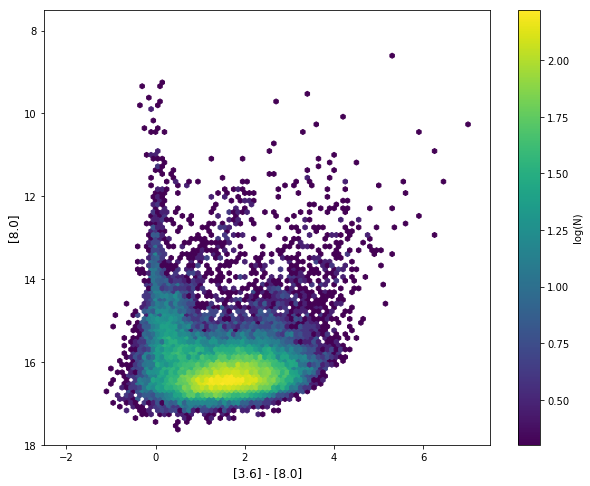

In [9]:
# [8.0] vs. [3.6]-[8.0]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.threesixMINUSeightzero,filter_phot_data.k80mag,',')
plt.xlim(-2.5, 7.5)
plt.ylim(18.0, 7.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#plt.savefig('[8.0]_vs_[3.6]-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.5, 7.5)
plt.ylim(18.0, 7.5)
im1 = ax1.hexbin(filter_phot_data.threesixMINUSeightzero, filter_phot_data.k80mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.5, 7.5, 18.0, 7.5))
ax1.set_xlabel('[3.6] - [8.0]', size=12)
ax1.set_ylabel('[8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[8.0]_vs_[3.6]-[8.0]_hist.pdf')

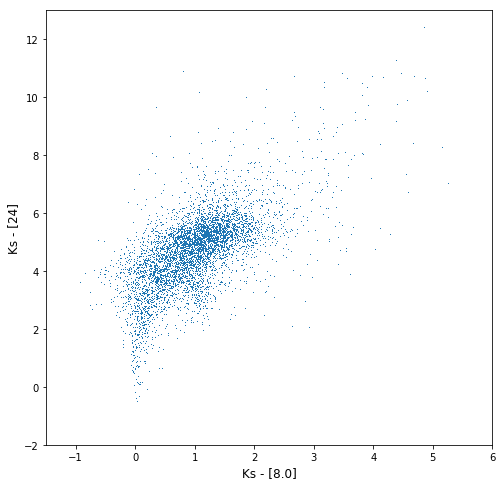

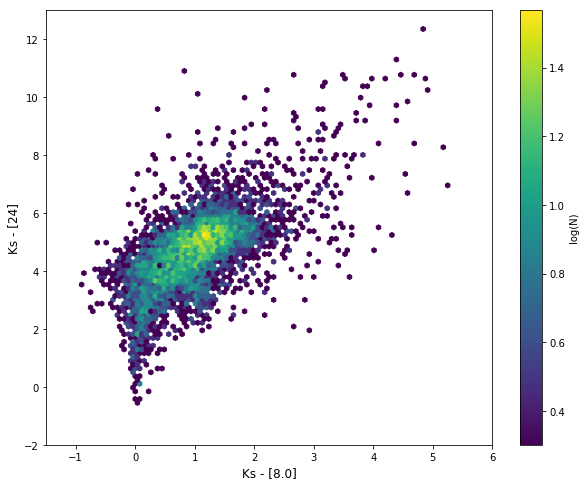

In [10]:
# Ks-[24] vs. Ks-[8.0]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.kMINUSeightzero,filter_phot_data.kMINUStwentyfour,',')
plt.xlim(-1.5, 6.0)
plt.ylim(-2.0, 13.0)
plt.xlabel('Ks - [8.0]', size=12)
plt.ylabel('Ks - [24]', size=12)
#plt.savefig('Ks-[24]_vs_Ks-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.5, 6.0)
plt.ylim(-2.0, 13.0)
im1 = ax1.hexbin(filter_phot_data.kMINUSeightzero,filter_phot_data.kMINUStwentyfour, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.5, 6.0, -2.0, 13.0))
ax1.set_xlabel('Ks - [8.0]', size=12)
ax1.set_ylabel('Ks - [24]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('Ks-[24]_vs_Ks-[8.0]_hist.pdf')

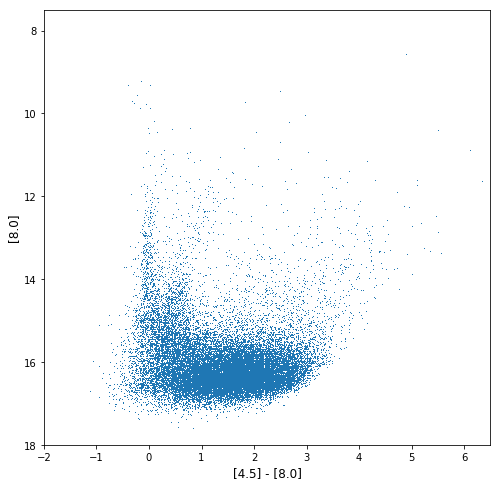

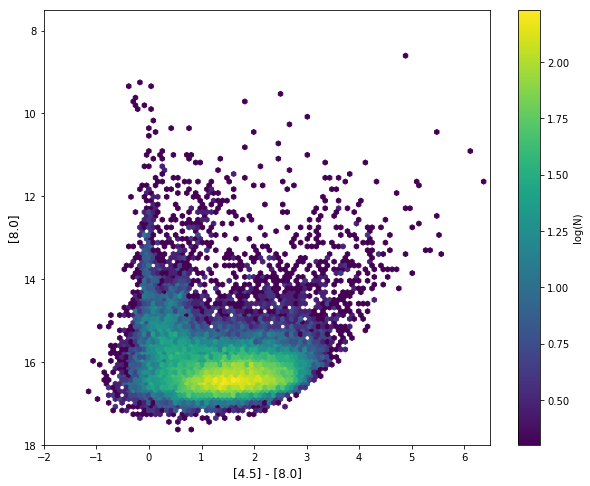

In [11]:
# [8.0] vs. [4.5]-[8.0]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.fourfiveMINUSeightzero,filter_phot_data.k80mag,',')
plt.xlim(-2.0, 6.5)
plt.ylim(18.0, 7.5)
plt.xlabel('[4.5] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#plt.savefig('[8.0]_vs_[4.5]-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.0, 6.5)
plt.ylim(18.0, 7.5)
im1 = ax1.hexbin(filter_phot_data.fourfiveMINUSeightzero, filter_phot_data.k80mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.0, 6.5, 18.0, 7.5))
ax1.set_xlabel('[4.5] - [8.0]', size=12)
ax1.set_ylabel('[8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[8.0]_vs_[4.5]-[8.0]_hist.pdf')

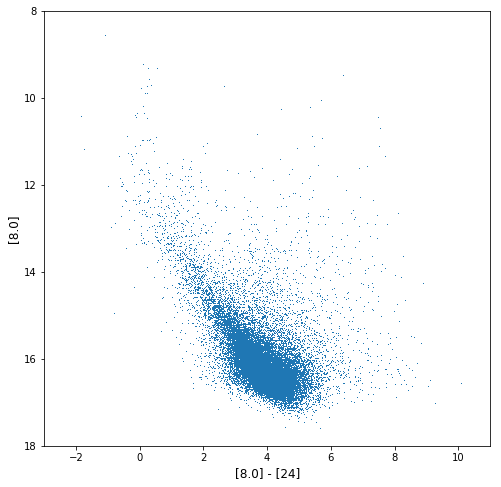

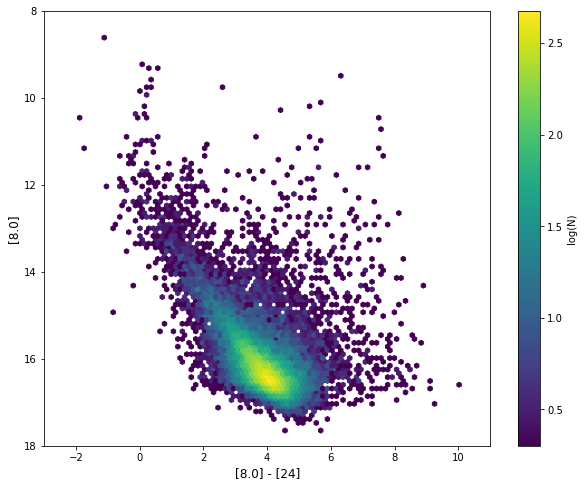

In [12]:
# [8.0] vs. [8.0]-[24]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.eightzeroMINUStwentyfour,filter_phot_data.k80mag,',')
plt.xlim(-3.0, 11.0)
plt.ylim(18.0, 8.0)
plt.xlabel('[8.0] - [24]', size=12)
plt.ylabel('[8.0]', size=12)
#plt.savefig('[8.0]_vs_[8.0]-[24]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.0, 11.0)
plt.ylim(18.0, 8.0)
im1 = ax1.hexbin(filter_phot_data.eightzeroMINUStwentyfour, filter_phot_data.k80mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.0, 11.0, 18.0, 8.0))
ax1.set_xlabel('[8.0] - [24]', size=12)
ax1.set_ylabel('[8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[8.0]_vs_[8.0]-[24]_hist.pdf')

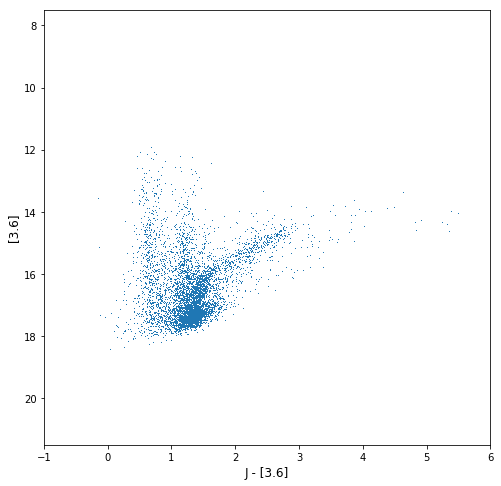

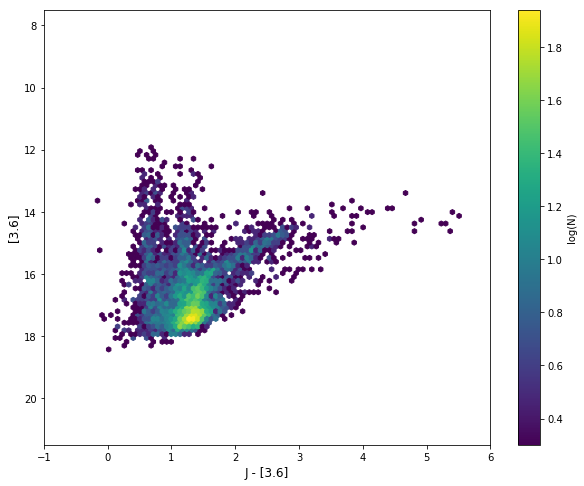

In [13]:
# [3.6] vs. J-[3.6]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSthreesix,filter_phot_data.k36mag,',')
plt.xlim(-1.0, 6.0)
plt.ylim(21.5, 7.5)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#plt.savefig('[3.6]_vs_J-[3.6]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.0, 6.0)
plt.ylim(21.5, 7.5)
im1 = ax1.hexbin(filter_phot_data.jMINUSthreesix, filter_phot_data.k36mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.0, 6.0, 21.5, 7.5))
ax1.set_xlabel('J - [3.6]', size=12)
ax1.set_ylabel('[3.6]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[3.6]_vs_J-[3.6]_hist.pdf')

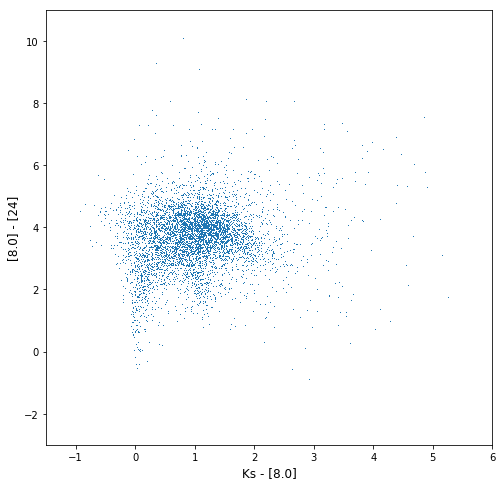

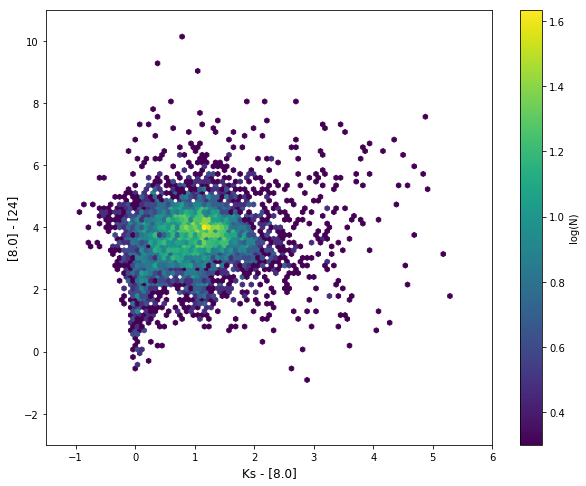

In [14]:
# [8.0]-[24] vs. Ks-[8.0] 
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.kMINUSeightzero, filter_phot_data.eightzeroMINUStwentyfour,',')
plt.xlim(-1.5, 6.0)
plt.ylim(-3.0, 11.0)
plt.xlabel('Ks - [8.0]', size=12)
plt.ylabel('[8.0] - [24]', size=12)
#plt.savefig('[8.0]-[24]_vs_Ks-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.5, 6.0)
plt.ylim(-3.0, 11.0)
im1 = ax1.hexbin(filter_phot_data.kMINUSeightzero, filter_phot_data.eightzeroMINUStwentyfour, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.5, 6.0, -3.0, 11.0))
ax1.set_xlabel('Ks - [8.0]', size=12)
ax1.set_ylabel('[8.0] - [24]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[8.0]-[24]_vs_Ks-[8.0]_hist.pdf')